<a href="https://www.kaggle.com/code/andrewgustyjrstudent/scilympiad-ml?scriptVersionId=93587989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn # machine learning functions

df = pd.read_csv('../input/soni2022/train.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.450,0.360,0.110,0.4470,0.2030,0.0820,0.1300,12
1,M,0.535,0.420,0.160,0.7200,0.2750,0.1640,0.2250,15
2,M,0.620,0.480,0.160,1.0765,0.4120,0.2530,0.3000,13
3,F,0.605,0.480,0.150,1.0790,0.4505,0.2835,0.2930,10
4,I,0.620,0.485,0.180,1.1785,0.4675,0.2655,0.3900,13
...,...,...,...,...,...,...,...,...,...
3336,M,0.660,0.530,0.195,1.5505,0.6505,0.3295,0.4950,10
3337,M,0.455,0.375,0.125,0.4840,0.2155,0.1020,0.1650,7
3338,I,0.545,0.430,0.130,0.7595,0.3580,0.1530,0.2055,8
3339,F,0.670,0.540,0.165,1.5015,0.5180,0.3580,0.5050,14


In [2]:
# Convert categorial data to numerical data
i = 0
while(i < len(df['Sex'])):
    if(df.iloc[i]['Sex'] == 'M'):
        df.at[i, 'Sex'] = 1
    elif(df.iloc[i]['Sex'] == 'I'):
        df.at[i, 'Sex'] = 0
    else:
        df.at[i, 'Sex'] = -1
    i += 1
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-1,0.450,0.360,0.110,0.4470,0.2030,0.0820,0.1300,12
1,1,0.535,0.420,0.160,0.7200,0.2750,0.1640,0.2250,15
2,1,0.620,0.480,0.160,1.0765,0.4120,0.2530,0.3000,13
3,-1,0.605,0.480,0.150,1.0790,0.4505,0.2835,0.2930,10
4,0,0.620,0.485,0.180,1.1785,0.4675,0.2655,0.3900,13
...,...,...,...,...,...,...,...,...,...
3336,1,0.660,0.530,0.195,1.5505,0.6505,0.3295,0.4950,10
3337,1,0.455,0.375,0.125,0.4840,0.2155,0.1020,0.1650,7
3338,0,0.545,0.430,0.130,0.7595,0.3580,0.1530,0.2055,8
3339,-1,0.670,0.540,0.165,1.5015,0.5180,0.3580,0.5050,14


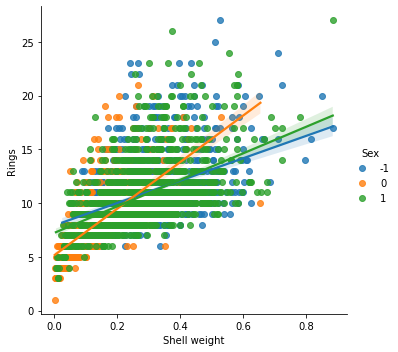

In [3]:
import seaborn as sns #here we notice that for sex, there is a significantly different trend for animals of sex 'I' than for animals of sex 'M' or 'F'
sns.lmplot(x="Shell weight", y="Rings", hue="Sex", data=df);

In [4]:
# Create a new data column to capture the different correlation that appears between shell weight an animals of sex "I"
sex_diam = []
for j in range(len(df['Sex'])):
    if(df.iloc[j]['Sex'] == 0):
        sex_diam.append(df.iloc[j]['Shell weight'])
    else:
        sex_diam.append(0)
df['sex_diam'] = sex_diam

# The ratio between shell weight and diameter may affect ring count, for example, a 
# high shell weight relative to diameter may indicate high growth, or lots of rings
swd = []
for k in range(len(df['Shell weight'])):
    swd.append(df.iloc[k]['Shell weight']/df.iloc[k]['Diameter'])
df['sw/d'] = swd

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex_diam,sw/d
0,-1,0.450,0.360,0.110,0.4470,0.2030,0.0820,0.1300,12,0.0000,0.361111
1,1,0.535,0.420,0.160,0.7200,0.2750,0.1640,0.2250,15,0.0000,0.535714
2,1,0.620,0.480,0.160,1.0765,0.4120,0.2530,0.3000,13,0.0000,0.625000
3,-1,0.605,0.480,0.150,1.0790,0.4505,0.2835,0.2930,10,0.0000,0.610417
4,0,0.620,0.485,0.180,1.1785,0.4675,0.2655,0.3900,13,0.3900,0.804124
...,...,...,...,...,...,...,...,...,...,...,...
3336,1,0.660,0.530,0.195,1.5505,0.6505,0.3295,0.4950,10,0.0000,0.933962
3337,1,0.455,0.375,0.125,0.4840,0.2155,0.1020,0.1650,7,0.0000,0.440000
3338,0,0.545,0.430,0.130,0.7595,0.3580,0.1530,0.2055,8,0.2055,0.477907
3339,-1,0.670,0.540,0.165,1.5015,0.5180,0.3580,0.5050,14,0.0000,0.935185


In [5]:
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'sex_diam', 'sw/d']
labels = ['Rings']
x = df[features]
y = df[labels]
y = np.ravel(y)
from sklearn.feature_selection import mutual_info_regression

# Mutual information tells us how much information each class provides, higher MI means higher information gained
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, 'auto')
mi_scores  # show a few features with their MI scores

sw/d              0.472396
Shell weight      0.455563
Diameter          0.397507
Height            0.389195
Whole weight      0.386838
Viscera weight    0.380610
Length            0.378736
Shucked weight    0.343457
sex_diam          0.322900
Name: MI Scores, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.neural_network import MLPClassifier
# Overall, the data correlated poorly with number of rings, so I kept my le
neural_net = MLPClassifier(max_iter = 500, learning_rate_init = 0.002, learning_rate = 'invscaling', hidden_layer_sizes = (100, 50, 100, 25), random_state=1)
neural_net.fit(x, y)

MLPClassifier(hidden_layer_sizes=(100, 50, 100, 25), learning_rate='invscaling',
              learning_rate_init=0.002, max_iter=500, random_state=1)

In [7]:
# Get an idea of how our model performs
y_pred = neural_net.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.3014354066985646


In [8]:
# After training, we follow the same process for testing
test_df = pd.read_csv('../input/soni2022/test.csv')

n = 0
while(n < len(test_df['Sex'])):
    if(test_df.iloc[n]['Sex'] == 'M'):
        test_df.at[n, 'Sex'] = 1
    elif(test_df.iloc[n]['Sex'] == 'F'):
        test_df.at[n, 'Sex'] = 0
    else:
        test_df.at[n, 'Sex'] = -1
    n += 1

sex_diam_test = []
for l in range(len(test_df['Sex'])):
    if(test_df.iloc[l]['Sex'] == 0):
        sex_diam_test.append(test_df.iloc[l]['Shell weight'])
    else:
        sex_diam_test.append(0)
test_df['sex_diam'] = sex_diam_test

swd_test = []
for m in range(len(test_df['Shell weight'])):
    swd_test.append(test_df.iloc[m]['Shell weight']/test_df.iloc[m]['Diameter'])
test_df['sw/d'] = swd_test


In [9]:
x_test_df = test_df[features]
y_pred_test = neural_net.predict(x_test_df)
y_pred_df = pd.DataFrame(test_df['id'], columns=['id'])
y_pred_df['Rings'] = y_pred_test
y_pred_df.reset_index(drop=True, inplace=True)
y_pred_df.to_csv('submission.csv',index=False)

In [10]:
print(y_pred_df)

      id  Rings
0      0      6
1      1      5
2      2      7
3      3     11
4      4     13
..   ...    ...
831  831     11
832  832     11
833  833     10
834  834     11
835  835      8

[836 rows x 2 columns]
